# - <EDA과제1 - 이디야는 전략적으로 스타벅스 근처에 매장을 낼까? > 
 ## - 1) 스타벅스  
 ## - 2) 이디야

In [100]:
import time
import requests
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import requests as req
import pandas as pd
from selenium import webdriver
from matplotlib import rc
from bs4 import BeautifulSoup
from urllib.request import urlopen



In [101]:
options = webdriver.ChromeOptions()
options.add_experimental_option("excludeSwitches", ["enable-logging"])
wd = webdriver.Chrome("./chromedriver.exe", options = options )

C:\Users\admin\AppData\Local\Temp\ipykernel_17384\2662585664.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome("./chromedriver.exe", options = options )


In [102]:
star_url = "https://www.starbucks.co.kr/store/store_map.do"
wd.get(star_url)

In [103]:

# selenium 4 버전 변경되면서 함수원형 수정됨
# 새 패키지 추가
from selenium.webdriver.common.by import By

In [104]:
# wd.find_element_by_xpath('//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()

wd.find_element(By.XPATH,'//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click() 
time.sleep(2)
wd.find_element(By.XPATH,'//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/article[2]/div[1]/div[2]/ul/li[1]/a').click()
time.sleep(2)
wd.find_element(By.XPATH,'//*[@id="mCSB_2_container"]/ul/li[1]/a').click() 
time.sleep(2)

In [105]:
req = wd.page_source
soup = BeautifulSoup(req, "html.parser")
info = soup.find("div", id = "mCSB_3_container").find_all("li", class_ = 'quickResultLstCon')
len(info), info[0]

(588,
 <li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N">역삼아레나빌딩  </strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>)

In [106]:
name = info[0].find("strong").text.strip()
address = info[0].find(class_="result_details").text.strip()[:-9]
place = address.split(" ")[1]

name, address, place

('역삼아레나빌딩', '서울특별시 강남구 언주로 425 (역삼동)', '강남구')

In [107]:
star_info = []
for item in info :
    name = item.find("strong").text.strip()
    address = item.find(class_="result_details").text.strip()[:-9]
    place = address.split(" ")[1]
   
    data = {
        "가게명" : name,
        "주소" : address,
        "구" : place
    }
    star_info.append(data)
len(star_info)

588

In [108]:
df_star = pd.DataFrame(star_info, columns = ['가게명', '구', '주소'])
df_star.tail()

,가게명,구,주소
583,중랑구청,중랑구,서울특별시 중랑구 신내로 72
584,사가정역,중랑구,서울특별시 중랑구 면목로 310
585,상봉역,중랑구,서울특별시 중랑구 망우로 307 (상봉동)
586,묵동,중랑구,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층"
587,중화역,중랑구,서울특별시 중랑구 봉화산로 35


In [109]:
gu_list = list(set(df_star["구"]))
gu_list

['성동구',
 '서대문구',
 '금천구',
 '중구',
 '강서구',
 '구로구',
 '도봉구',
 '양천구',
 '강남구',
 '광진구',
 '동작구',
 '노원구',
 '영등포구',
 '서초구',
 '중랑구',
 '관악구',
 '강북구',
 '마포구',
 '용산구',
 '종로구',
 '성북구',
 '강동구',
 '은평구',
 '동대문구',
 '송파구']

# <이디야 >

In [110]:
edi_url = "https://www.ediya.com/contents/find_store.html"
wd = webdriver.Chrome("./chromedriver.exe", options = options )
wd.get(edi_url)

C:\Users\admin\AppData\Local\Temp\ipykernel_17384\4034697150.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome("./chromedriver.exe", options = options )


In [111]:
edi_info = []



for gu in gu_list:
    wd.find_element(By.XPATH,'//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]/a').click()
    wd.find_element(By.XPATH,'//*[@id="keyword"]').clear
    wd.find_element(By.XPATH,'//*[@id="keyword"]').send_keys("서울 " + gu)
    wd.find_element(By.XPATH,'//*[@id="keyword_div"]/form/button').click()
    
    html = wd.page_source
    soup = BeautifulSoup(html, "html.parser")
    
    info = soup.find("ul", id = "placesList").find_all("li", class_='item')
    
    for item in info:
        name = item.find("dt").text
        address = item.find("dd").text.strip()
        place = address.split(" ")[1]
        
        data = {
            "가게명" : name,
            "구" : place,
            "주소" : address,
        }
        edi_info.append(data)
 
len(edi_info)

706

In [112]:
df_edi = pd.DataFrame(edi_info)
df_edi.tail()

,가게명,구,주소
701,천호로데오점,강동구,서울 강동구 천호대로 1027 (천호동)
702,천호역점,강동구,서울 강동구 천호대로 1006 (성내동)
703,천호중앙점,강동구,"서울 강동구 올림픽로 660 (천호동, 천호엘크루주상복합)"
704,천호초교사거리점,강동구,"서울 강동구 구천면로 304 (천호동, 일주빌딩)"
705,천호현대점,강동구,서울 강동구 올림픽로 665 (천호동)


In [113]:
star_count = []
for item in gu_list:
    n = len(df_star.loc[df_star['구']==item])
    data = {
        "구" : item,
        "스벅 매장수" : n
    }
    star_count.append(data)
df_star_count = pd.DataFrame(star_count)
df_star_count

,구,스벅 매장수
0,성동구,13
1,서대문구,21
2,금천구,13
3,중구,53
4,강서구,26
5,구로구,12
6,도봉구,4
7,양천구,17
8,강남구,89
9,광진구,19


# 이디야 데이터

In [114]:
edi_count = []
for item in gu_list:
    n = len(df_edi.loc[df_edi['구']==item])
    data = {
        "구" : item,
        "이디야 매장수" : n
    }
    edi_count.append(data)
df_edi_count = pd.DataFrame(edi_count)
df_edi_count

,구,이디야 매장수
0,성동구,46
1,서대문구,21
2,금천구,0
3,중구,58
4,강서구,34
5,구로구,56
6,도봉구,48
7,양천구,0
8,강남구,44
9,광진구,24


In [115]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list
 #'Malgun Gothic'

['STIXSizeOneSym',
 'STIXSizeThreeSym',
 'DejaVu Sans',
 'cmb10',
 'cmtt10',
 'STIXNonUnicode',
 'DejaVu Sans',
 'DejaVu Sans',
 'STIXGeneral',
 'STIXGeneral',
 'STIXSizeFourSym',
 'STIXSizeTwoSym',
 'STIXNonUnicode',
 'DejaVu Serif',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'STIXSizeOneSym',
 'DejaVu Sans Mono',
 'DejaVu Sans Display',
 'cmss10',
 'STIXSizeTwoSym',
 'cmsy10',
 'cmex10',
 'STIXGeneral',
 'DejaVu Sans',
 'DejaVu Serif',
 'STIXSizeFiveSym',
 'STIXSizeThreeSym',
 'STIXSizeFourSym',
 'DejaVu Sans Mono',
 'cmmi10',
 'STIXNonUnicode',
 'cmr10',
 'DejaVu Serif',
 'STIXGeneral',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'DejaVu Serif Display',
 'Modern No. 20',
 'Verdana',
 'Rockwell Condensed',
 'Kunstler Script',
 'Pyunji R',
 'New Gulim',
 'Segoe UI',
 'Calibri',
 'Trebuchet MS',
 'Tw Cen MT',
 'Century Gothic',
 'Imprint MT Shadow',
 'Candara',
 'Comic Sans MS',
 'Harlow Solid Italic',
 'Niagara Engraved',
 'Eras Medium ITC',
 'High Tower Text',
 'Constantia',
 'Wide Latin',


In [116]:
sum_data = pd.merge(df_edi_count, df_star_count)
sum_data["매장 수 차이"] = sum_data["이디야 매장수"] - sum_data["스벅 매장수"]
sum_data

,구,이디야 매장수,스벅 매장수,매장 수 차이
0,성동구,46,13,33
1,서대문구,21,21,0
2,금천구,0,13,-13
3,중구,58,53,5
4,강서구,34,26,8
5,구로구,56,12,44
6,도봉구,48,4,44
7,양천구,0,17,-17
8,강남구,44,89,-45
9,광진구,24,19,5


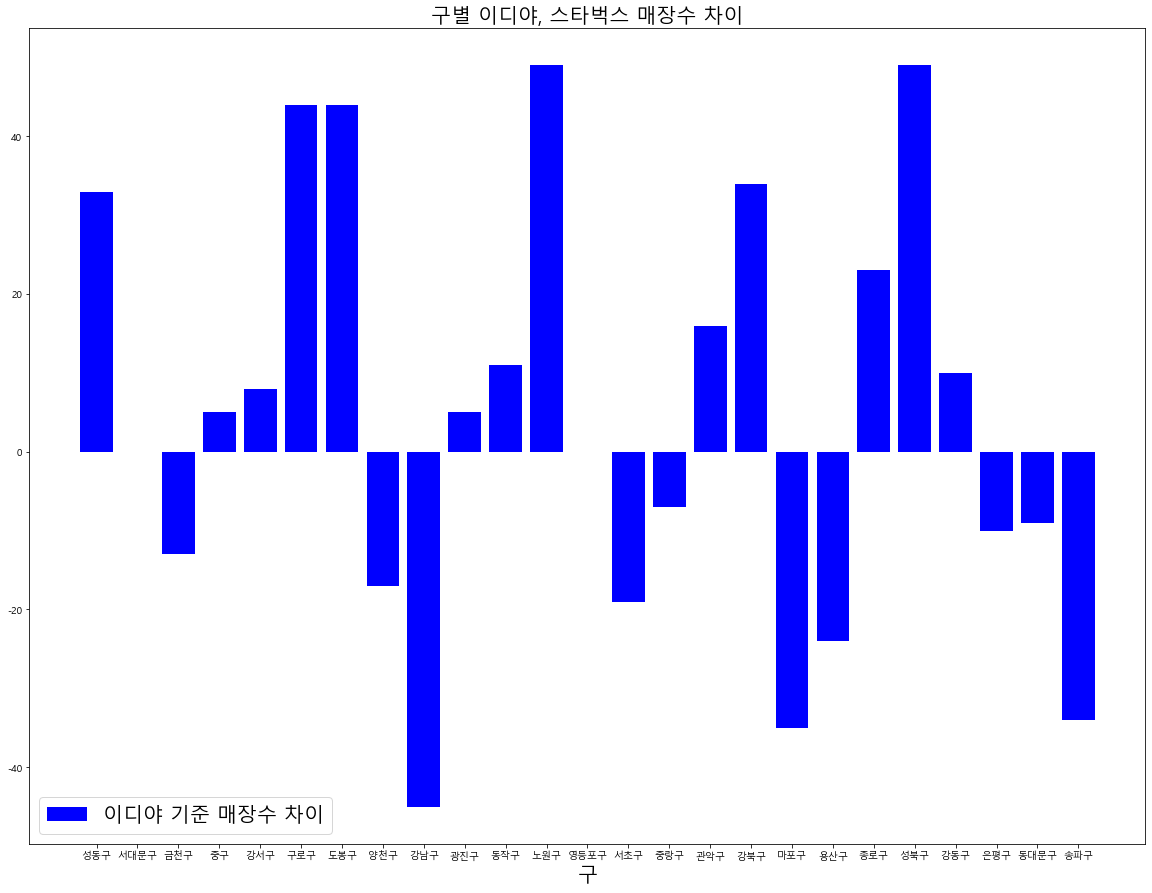

In [122]:
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False

a = sum_data["매장 수 차이"]
y = "ediya"

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(20,15))
plt.bar(sum_data["구"], a, color = 'b', label ="이디야 기준 매장수 차이" )
plt.title("구별 이디야, 스타벅스 매장수 차이", fontsize = 20)
plt.xlabel("구", fontsize = 20)
plt.legend(loc ='lower left', fontsize = 20)
plt.show()

# <그래프에서 한글 깨지는 거 해결하기 >

# 1. 추가
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list
 #'Malgun Gothic'



 # 2. 추가  

a = sum_data["매장 수 차이"]
y = "ediya"

#추가해주세요
plt.rcParams['font.family'] = 'Malgun Gothic'


plt.figure(figsize=(20,15))
plt.bar(sum_data["구"], a, color = 'b', label ="이디야 기준 매장수 차이" )
plt.title("구별 이디야, 스타벅스 매장수 차이", fontsize = 20)
plt.xlabel("구", fontsize = 20)
plt.legend(loc ='lower left', fontsize = 20)
plt.show()


 # 3. 음수 나타내기 
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False